# Classification Example using TensorFlow with Keras

This example will explore the classification problem using TensorFlow 2.0 with the Keras API. The problem will be classifying breast cancer as melingnant or benign using the Wsconsin Breast Cancer dataset.

## Configuration of the Colab notebook

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab_Notebooks/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning


## Data Exploration

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
directory = !pwd

In [6]:
directory[0]

'/content/drive/MyDrive/Colab_Notebooks/Refactored_Py_DS_ML_Bootcamp-master/22-Deep Learning'

In [7]:
# Load the data into a dataframe
df = df = pd.read_csv(directory[0] + '/DATA/cancer_classification.csv')

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Things to explore in the dataset:
1. General information about the dataset using .info() and .describe() methods.
2. Check for NaNs and explore methods to deal with them.
3. Checking the balance of the labels in the dataset.
4. Check for outliers and methods to deal with them.
5. Observe the shape and distribution of the variables in the dataframe
6. Check the relationships between the variables in the dataframe 
    1. Check for correlation between the variables
    2. Scatterplots
    3. Box plots

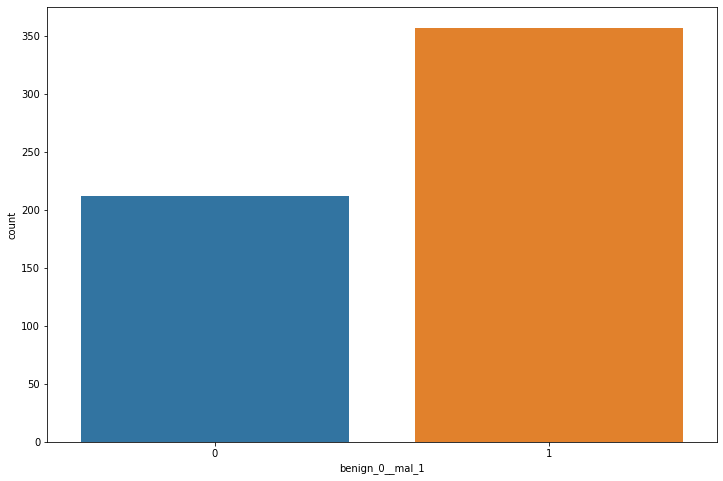

In [10]:
# Check the balance of the labels
plt.figure(figsize=(12,8))
sns.countplot(x='benign_0__mal_1',data=df);

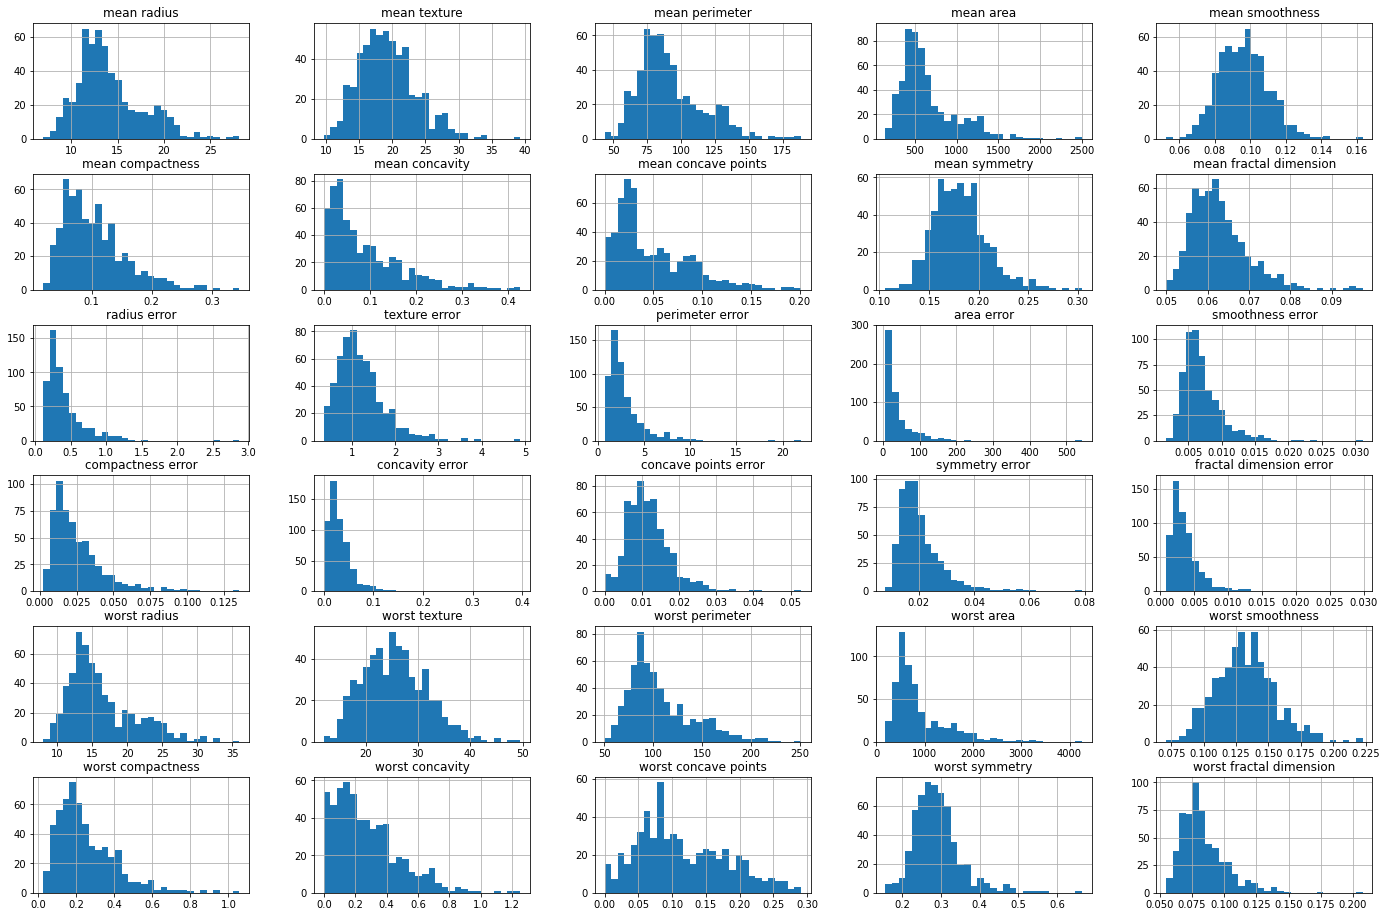

In [11]:
# Histogram of all variables
df.drop('benign_0__mal_1',axis=1).hist(bins=30, figsize=(24, 16));

In [12]:
# list the correlation of the variables in the dataset with the label
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

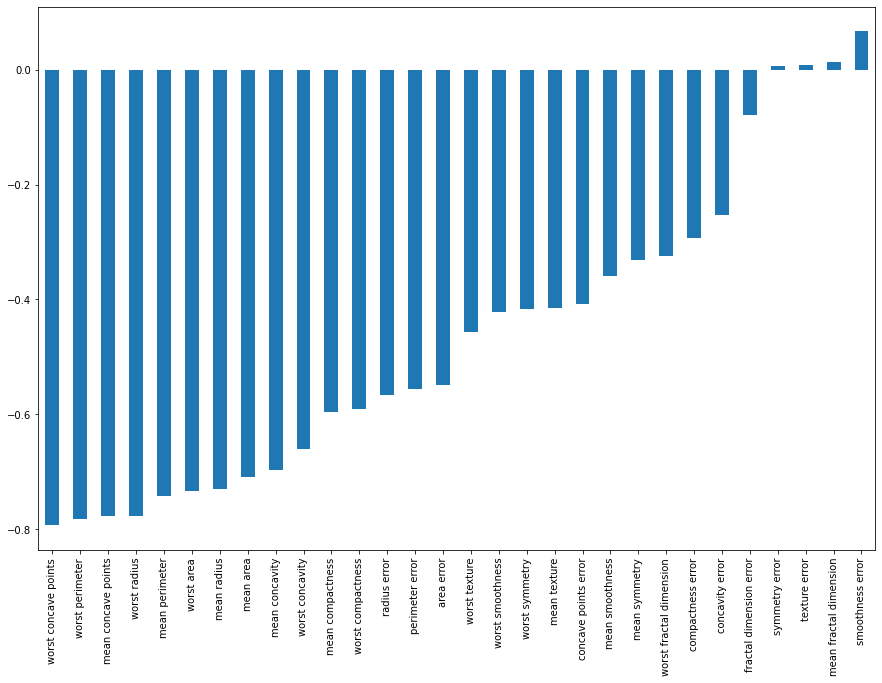

In [13]:
# plot the correlation of the variables in the dataset with the label
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar',figsize=(15, 10));

In [14]:
# plt.figure(figsize=(30,30))
# sns.pairplot(data=df,hue='benign_0__mal_1');

## Modelling the data using a NN classifier

Steps in the creation of a model, such as NN classifier
1. Split the data into a training and test dataset
2. Scale the data so that each variable has a proportianate weight and does not skew the data
3. Create an NN model by choosing number of layers and nodes, types of activation functions, optimisers and loss function
4. Train the NN on the training data by choosing the number of epochs, batch size and number of itterations and learning rate
5. Evaluate the model performance with the test set either during the network training or after




### Train Test Split the Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('benign_0__mal_1',axis=1)
y = df['benign_0__mal_1']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [18]:
type(X_test)

pandas.core.frame.DataFrame

### Scale the data

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Create a NN model


```
# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
```



In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [22]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

### Train the NN model

In [23]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.7289 - val_loss: 0.7007
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6763 - val_loss: 0.6614
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6380 - val_loss: 0.6223
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5966 - val_loss: 0.5798
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5488 - val_loss: 0.5291
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4960 - val_loss: 0.4739
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4415 - val_loss: 0.4195
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3894 - val_loss: 0.3701
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3458 - val_loss: 0.3282
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3101 - val_loss: 0.2944
Epoch 11

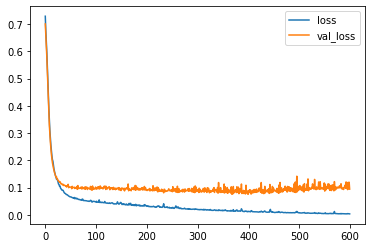

In [24]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Train the NN model using Early Stopping

In [25]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [28]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),verbose=1,callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6752 - val_loss: 0.6561
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6392 - val_loss: 0.6217
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6035 - val_loss: 0.5856
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5657 - val_loss: 0.5406
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5173 - val_loss: 0.4886
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4674 - val_loss: 0.4378
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4224 - val_loss: 0.3889
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3801 - val_loss: 0.3477
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3368 - val_loss: 0.3079
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3016 - val_loss: 0.2745
Epoch 11

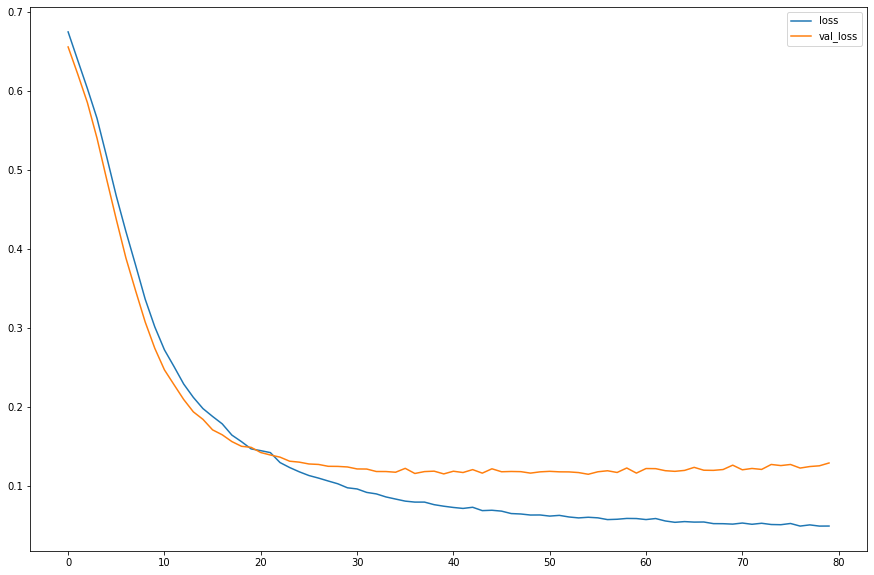

In [29]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot(figsize=(15,10))

### NN Model Evaluation

In [41]:
predictions = model.predict(X_test)

AttributeError: ignored

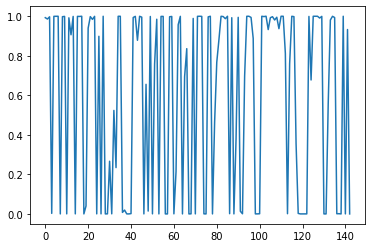

In [35]:
plt.plot(predictions)

In [48]:
predictions_classes = (predictions > 0.5).astype("int32")

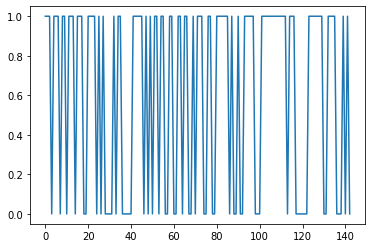

In [49]:
plt.plot(predictions_classes)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(y_test,predictions_classes))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [53]:
confusion_matrix(y_test,predictions_classes)

array([[54,  1],
       [ 2, 86]])